In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from deep_convnet import DeepConvNet
%matplotlib inline

from common.functions import softmax

Using TensorFlow backend.


In [2]:
# データの読み込み
(x_train, t_train), (x_test, t_test) = mnist.load_data()

# 正規化
x_test = x_test.astype(np.float32) / 255.0

In [3]:
eps = 0.3

In [4]:
network = DeepConvNet()

network.load_params("deep_convnet_params.pkl")
print("loaded Network Parameters!")

loaded Network Parameters!


In [11]:
def show_generate_adv(x, label, network, eps=0.01):
    x = x.reshape(1, 1, 28, 28)
    
    pre = network.predict(x)
    pre_label = np.argmax(pre)
    pre_score = round(max(softmax(pre[0])), 2)
    
    fig = plt.figure(figsize=(20, 20))
    fig.subplots_adjust(wspace=0.4, hspace=0.1)
    ax = fig.add_subplot(1, 3, 1)
    ax.set_title(f"{pre_label} : {pre_score}")
    ax.imshow(x.reshape(28,28), 'gray')
    
    d, g = network.gradient_for_fgsm(x, np.array([label]))
    d = d.reshape(28, 28)
    p = eps * np.sign(d)
    
    pre = network.predict(p.reshape(1, 1, 28, 28))
    pre_label = np.argmax(pre)
    pre_score = round(max(softmax(pre[0])), 2)
    
    ax = fig.add_subplot(1, 3, 2)
    ax.set_title(f"{pre_label} : {pre_score}")
    ax.imshow(p, 'gray')
    
    adv = (x + p).clip(min=0, max=1)
    adv = adv.reshape(1, 1, 28, 28)
    
    pre = network.predict(adv)
    pre_label = np.argmax(pre)
    pre_score = round(max(softmax(pre[0])), 2)
    
    ax = fig.add_subplot(1, 3, 3)
    ax.set_title(f"{pre_label} : {pre_score}")
    ax.imshow(adv.reshape(28,28), 'gray')
    
    return adv

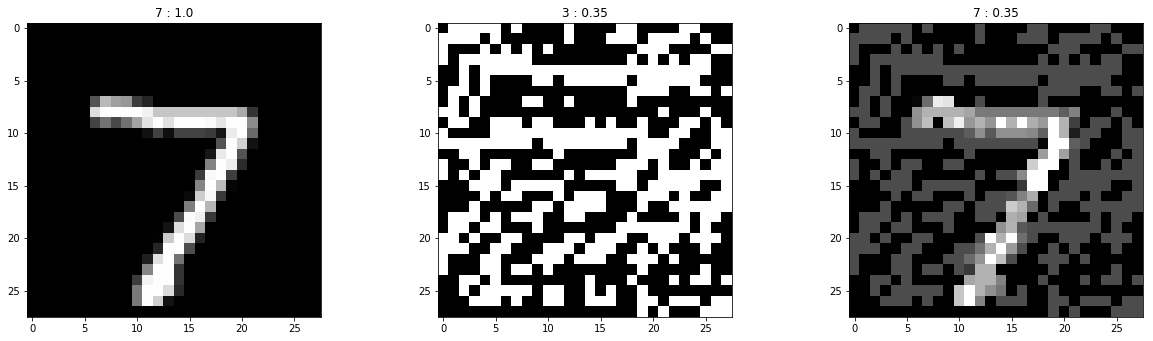

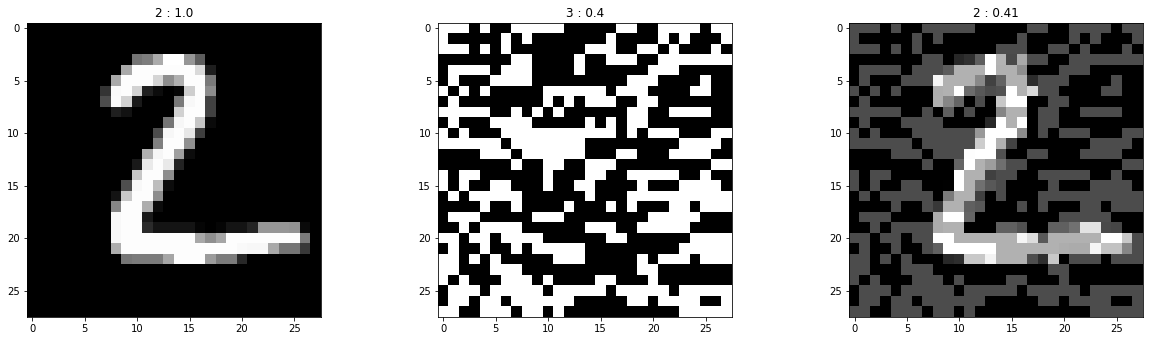

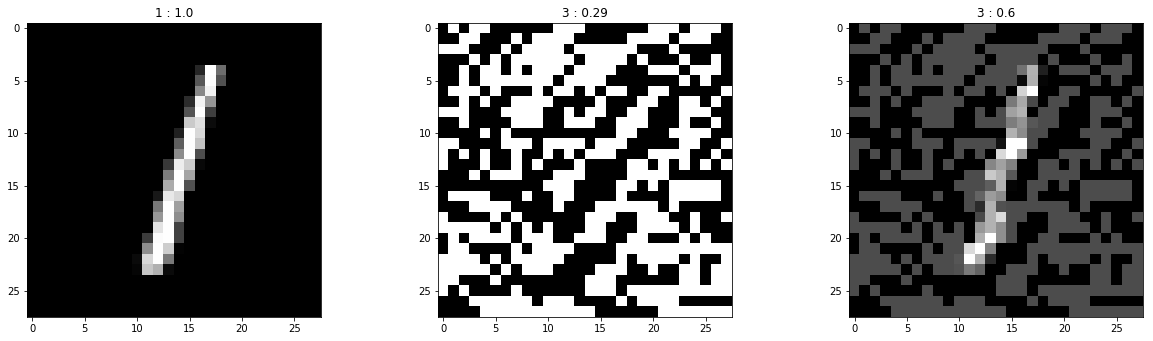

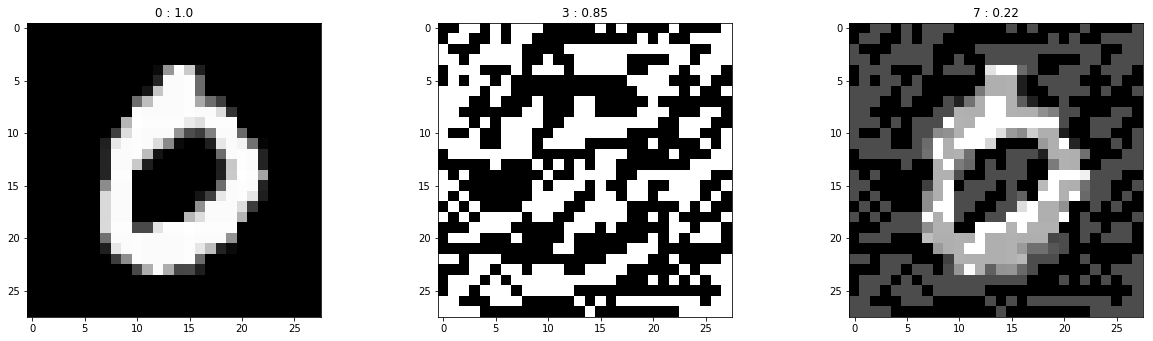

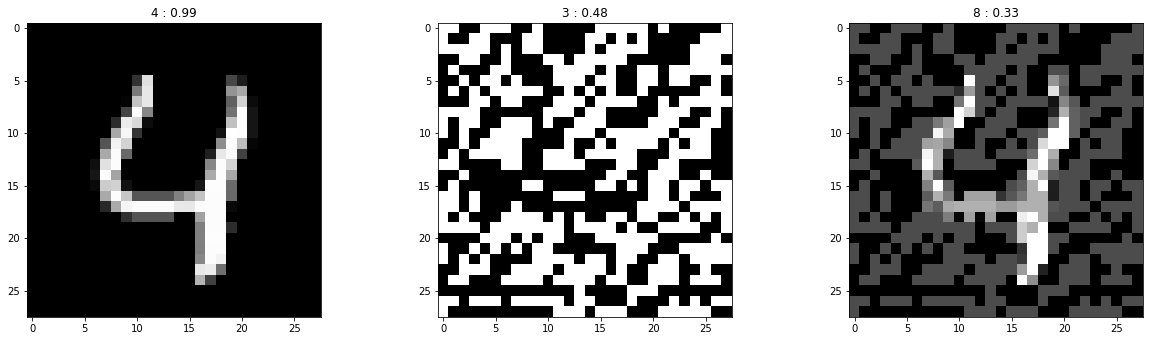

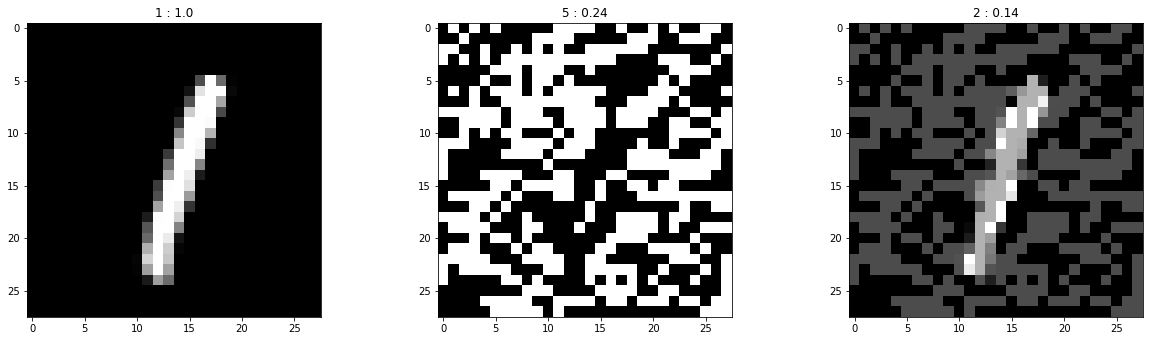

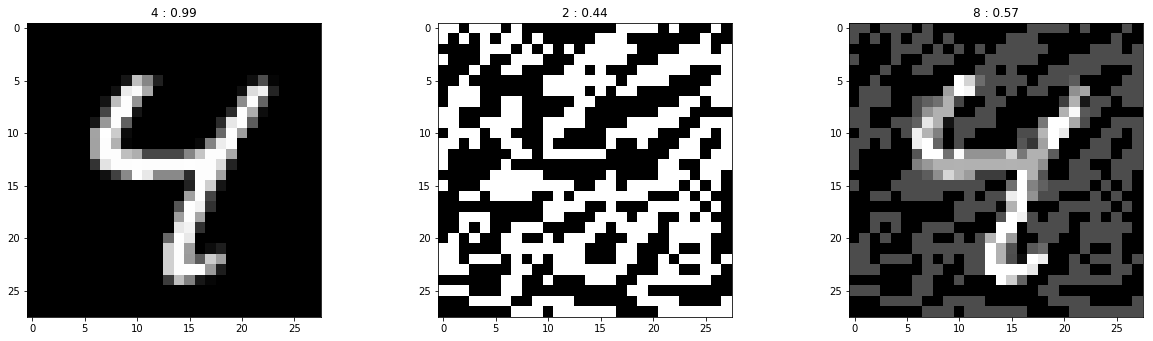

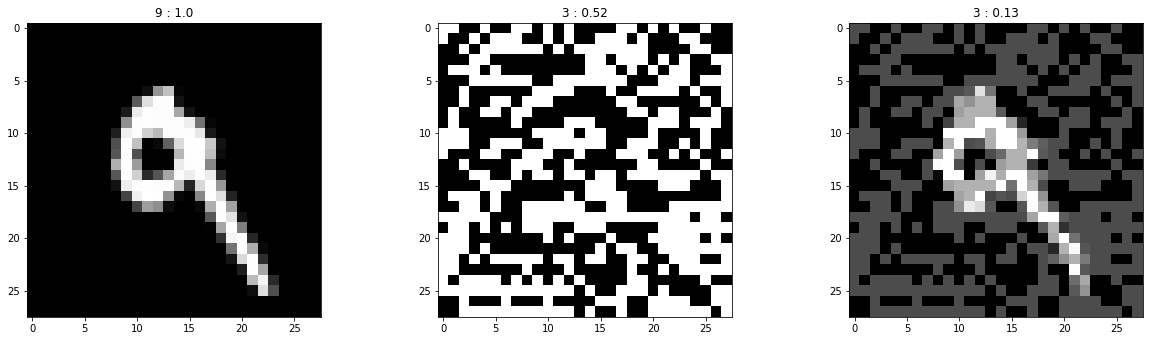

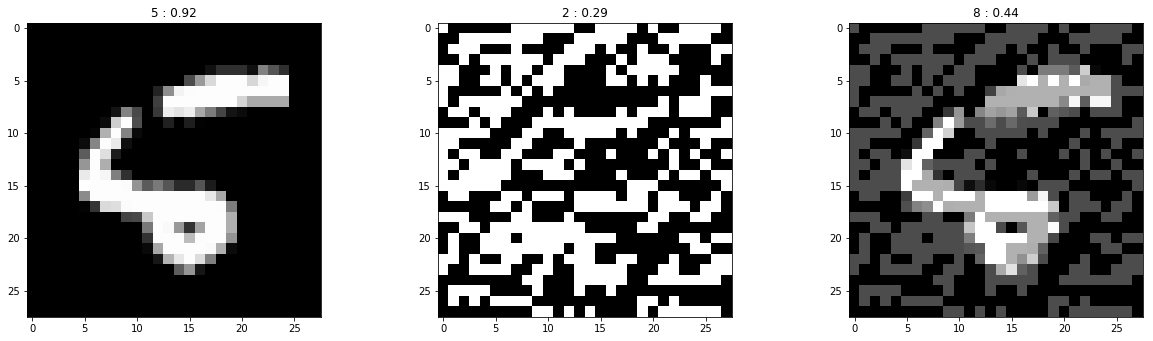

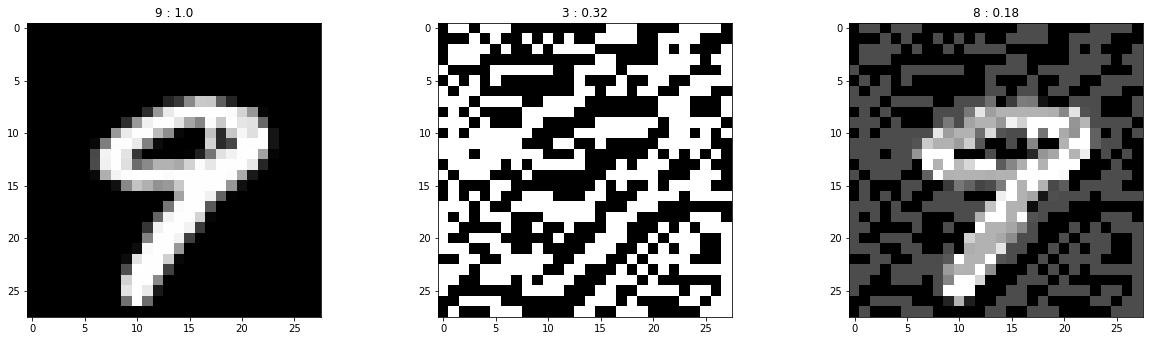

In [14]:
for x, y in zip(x_test[:10], t_test[:10]):
    adv = show_generate_adv(x, y, network, eps)

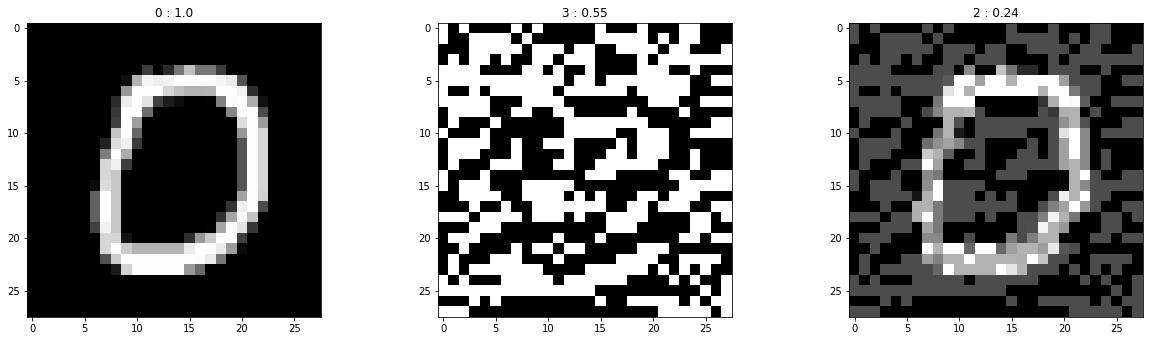

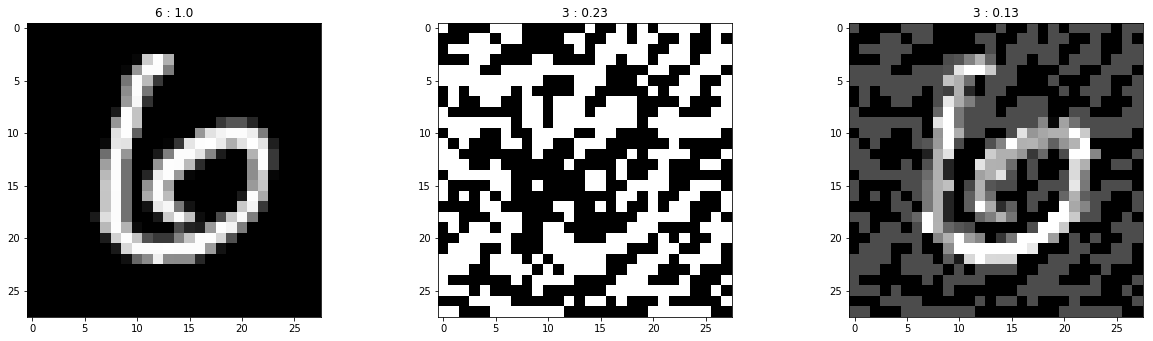

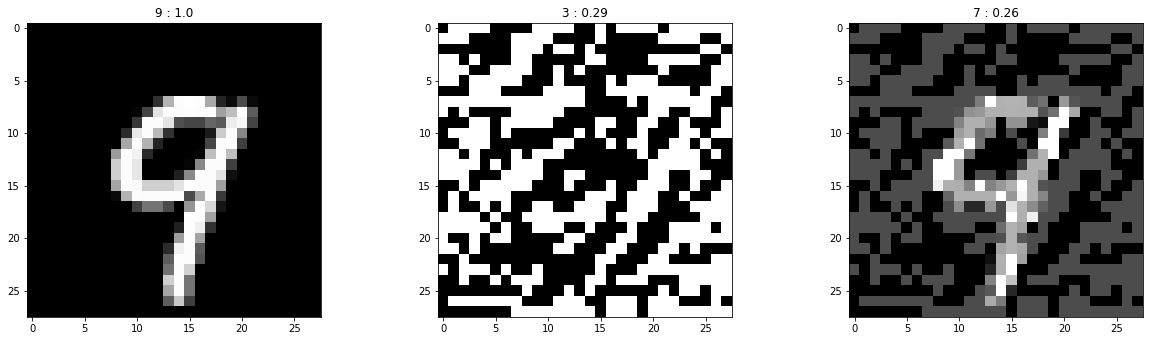

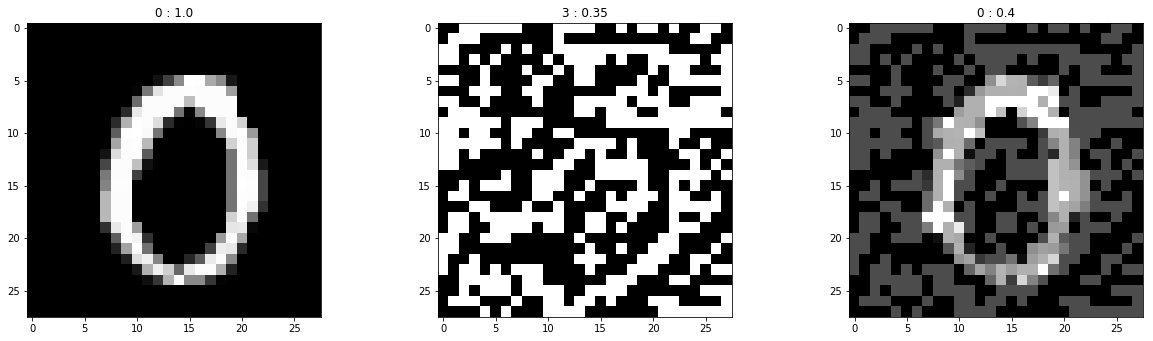

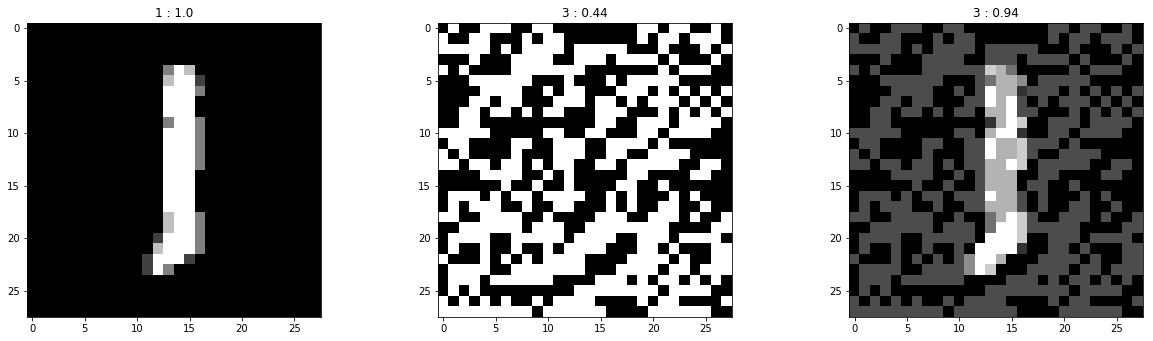

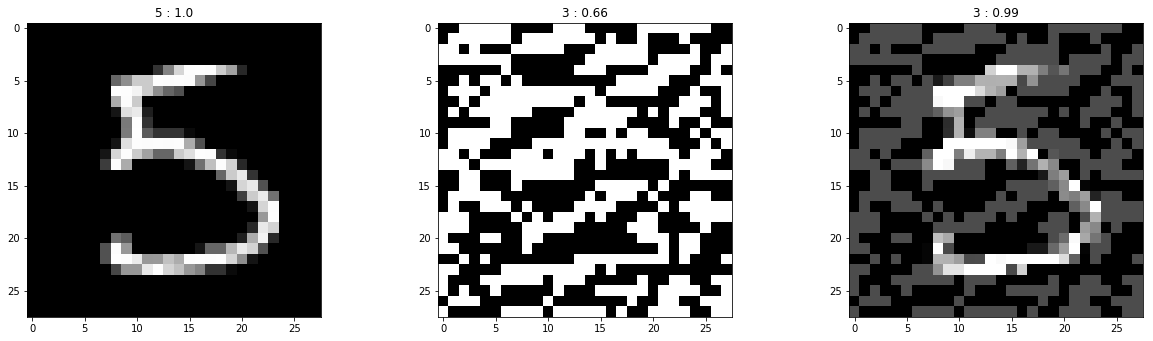

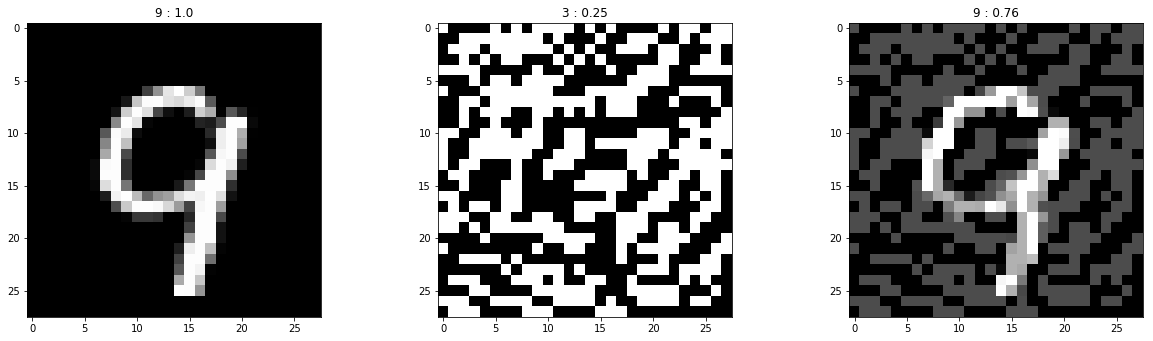

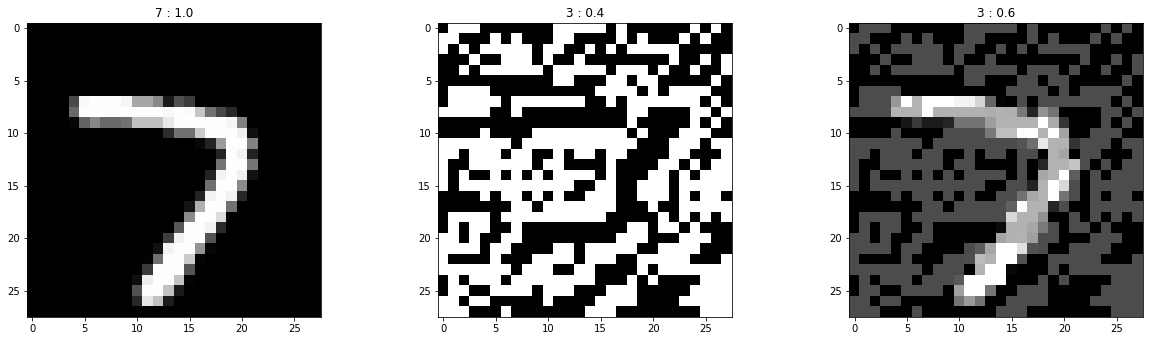

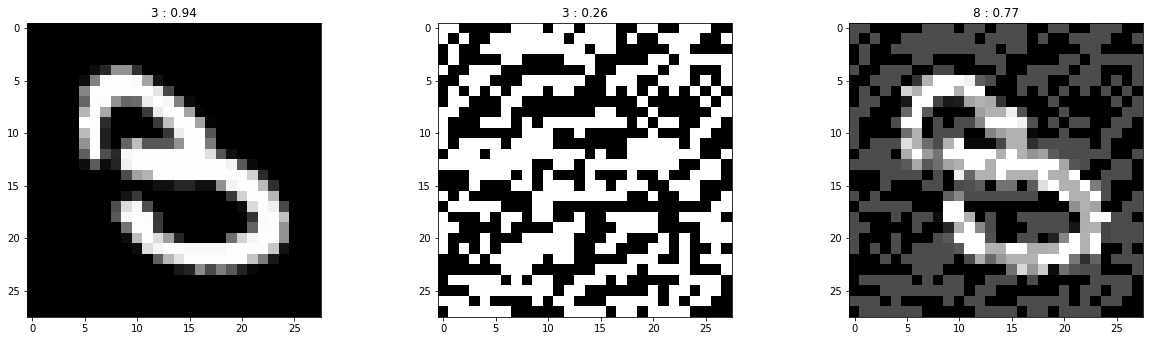

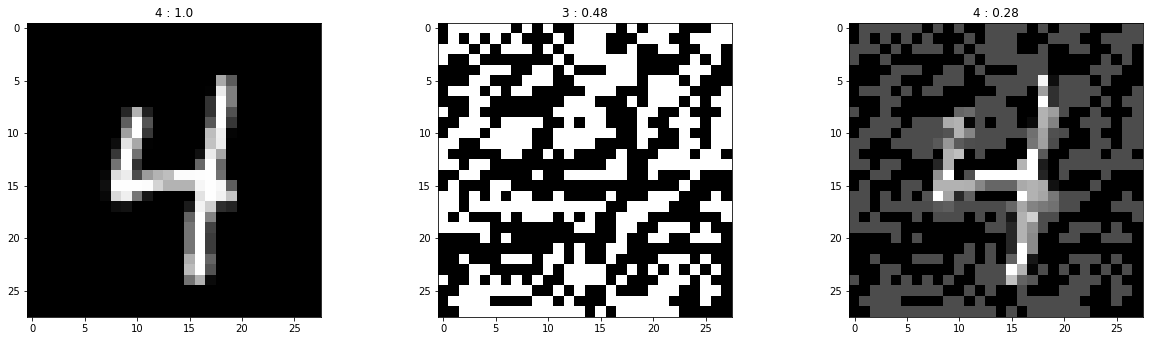

In [15]:
for x, y in zip(x_test[10:20], t_test[10:20]):
    adv = show_generate_adv(x, y, network, eps)